# Iris - Linear Regression - March 31

Starting to think about linear regression. 

This notebook is a continuation of the answers to the homework
that I showed on Feb 14. I've left in the old code here that
read in the data.

Jim Mahoney 

# Initial Setup

In [153]:
# python modules

from matplotlib import pyplot as plt
from typing import Union, List

from scratch.statistics import *
from scratch.probability import *

import numpy as np

import pprint
pp = pprint.PrettyPrinter(indent=4)      # see https://docs.python.org/3/library/pprint.html

### Get the data

In [154]:
# Read in the raw data.

csv_filename = './data/iris.csv'

# column indices (See the first header line of the csv file.
(i_sepal_length, i_sepal_width, i_petal_length, i_petal_width, i_species) = [0, 1, 2, 3, 4]

raw_lines = open(csv_filename).readlines()[1:]  # skip the first header line.

print(f"number of lines in '{csv_filename}' is {len(raw_lines)}")
raw_lines[:3]

number of lines in './data/iris.csv' is 150


['5.1,3.5,1.4,0.2,Iris-setosa\n',
 '4.9,3,1.4,0.2,Iris-setosa\n',
 '4.7,3.2,1.3,0.2,Iris-setosa\n']

In [155]:
# Define a data conversion utility routine.

def cleanup(entry: str) -> Union[float, str]:
    """ Convert entries like '5.0' to 5.0, and those 'Iris-setosa' to 'setosa' """
    entry = entry.strip()                        # remove trailing newline
    try:
        entry = float(entry)                     # convert number string to float
    except:
        pass
    try:
        entry = entry.replace('Iris-', '')       # remove 'Iris-' prefix from species
    except:
        pass
    return entry

assert cleanup('3.2') == 3.2
assert cleanup('Iris-setosa\n') == 'setosa'


In [156]:
# Process the data raw data into an intermediate form.

iris_data = []
for line in raw_lines:
    iris_data.append( [cleanup(entry) for entry in line.split(',')] )

# See a sample.
iris_data[:5] + ['...'] + iris_data[-5:]       

[[5.1, 3.5, 1.4, 0.2, 'setosa'],
 [4.9, 3.0, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.3, 0.2, 'setosa'],
 [4.6, 3.1, 1.5, 0.2, 'setosa'],
 [5.0, 3.6, 1.4, 0.2, 'setosa'],
 '...',
 [6.7, 3.0, 5.2, 2.3, 'virginica'],
 [6.3, 2.5, 5.0, 1.9, 'virginica'],
 [6.5, 3.0, 5.2, 2.0, 'virginica'],
 [6.2, 3.4, 5.4, 2.3, 'virginica'],
 [5.9, 3.0, 5.1, 1.8, 'virginica']]

In [157]:
# Further process into a dictionary iris[specie][leaf][direction] = [list of 50 numbers]
#
# (The approach here - looping over all rows for each of everything -
#  is too slow for big datasets but works fine here.)

species = ('setosa', 'virginica', 'versicolor')
leaves = ('sepal', 'petal')
directions = ('length', 'width')

def is_species(row, specie: str) -> bool:
    """ True if this row matches this specie """
    # This will help me get the data from just one of the three species.
    return row[i_species] == specie

def is_leaf(index, leaf):
    """ True if this index matches the given leaf type """
    if leaf == 'sepal':
        return index in (i_sepal_length, i_sepal_width)
    if leaf == 'petal':
        return index in (i_petal_length, i_petal_width)
    return False

def is_direction(index, direction):
    """ True if this is index matches the given direction """
    if direction == 'length':
        return index in (i_sepal_length, i_petal_length)
    if direction == 'width':
        return index in (i_sepal_width, i_petal_width)
    return False

assert is_species(iris_data[0], 'setosa')
assert is_leaf(i_sepal_length, 'sepal')
assert is_direction(i_sepal_length, 'length')

iris = {}
for specie in species:
    iris[specie] = {}
    for leaf in leaves:
        iris[specie][leaf] = {}
        for direction in directions:
            iris[specie][leaf][direction] = [row[i] 
                                             for row in iris_data
                                             for i in (0,1,2,3)
                                             if is_species(row, specie)
                                             if is_leaf(i, leaf)
                                             if is_direction(i, direction)]

for specie in species:
    for leaf in leaves:
        for direction in directions:
            print(f'--- {specie} {leaf} {direction} ---')
            print( iris[specie][leaf][direction])

--- setosa sepal length ---
[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0]
--- setosa sepal width ---
[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3]
--- setosa petal length ---
[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]
--- setosa petal width ---
[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0

### A bar chart

In [158]:
# Histogram counting
#
#    low                     high
#  |  .  |  .  |  .  |  .  |  .  |
#  |                             |
#  bucket_low                    bucket_high
#              <-   ->
#              bucket_size 
#

def get_buckets(low, high, n_buckets):
    """ return (bucket_edges, bucket_centers) given n=number of buckets, low & high bucket_centers """
    bucket_size = (high - low)/(n_buckets - 1)
    bucket_low = low - (bucket_size / 2)
    bucket_edges = [bucket_low + i * bucket_size for i in range(n_buckets + 1)]
    bucket_centers = [bucket_edges[i] + bucket_size/2 for i in range(n_buckets)]
    return (bucket_edges, bucket_centers)

def bucket_count(values, bucket_edges=None, n_buckets=None):
    """ Return counts of how many values are in each bucket """
    if not bucket_edges:
        (bucket_edges, bucket_centers) = get_buckets(min(values), max(values), n_buckets)
    if not n_buckets:
        n_buckets = len(bucket_edges) - 1
    counts = [0] * n_buckets
    for i in range(n_buckets):
        for value in values:
            if bucket_edges[i] < value <= bucket_edges[i+1]:
                counts[i] += 1
    return counts

test_values = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
test_counts = bucket_count(test_values, n_buckets=5)
assert sum(test_counts) == len(test_values)
assert test_counts == [1, 2, 3, 4, 5]

In [159]:
# Count the petal lengths of the three species into buckets.

petal_lengths = [row[i_petal_length] for row in iris_data]

(lowest, highest) = (min(petal_lengths), max(petal_lengths))
n_buckets = 20

(edges, centers) = get_buckets(lowest, highest, n_buckets)
labels = [f'{c:.2f}' for c in centers]
bucket_size = centers[1] - centers[0]
bar_width = bucket_size * 0.8 / 3

counts = {specie : bucket_count(iris[specie]['petal']['length'], bucket_edges=edges) for specie in species}

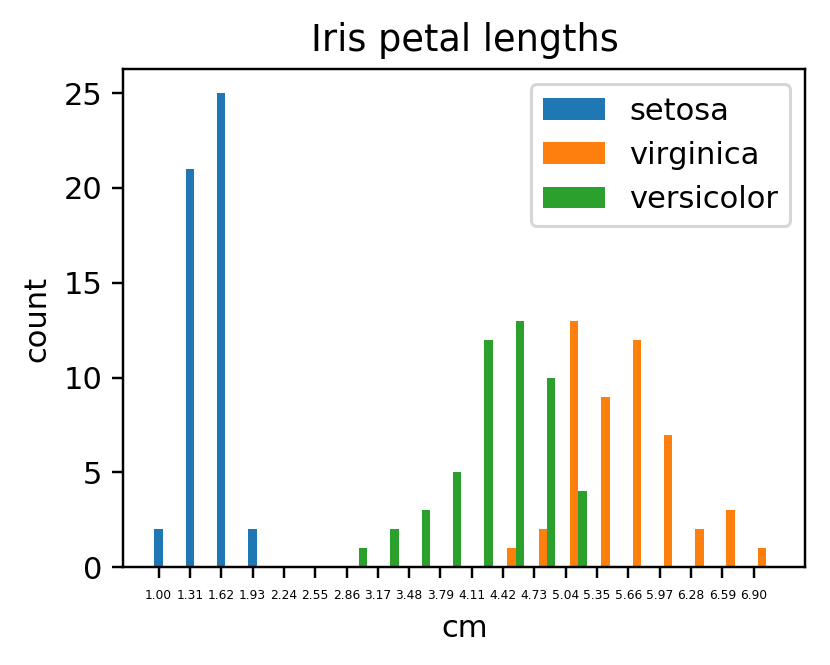

In [160]:
# A bar graph of petal lengths for all three species;
# see https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html

plt.figure(dpi=220, figsize=(4, 3))   # init & set size of the new plot (3" x 2", 220dpi)

offset = 0
for specie in species:    
    plt.bar([c + offset * bar_width for c in centers], counts[specie], bar_width, label=specie)
    offset += 1

plt.title('Iris petal lengths')
plt.ylabel("count")
plt.xlabel("cm")
plt.xticks(centers, labels, fontsize=4)
plt.legend()
#plt.xlim(bin_low, bin_hi)

plt.show ()

In [161]:
for specie in species:
    m = mean(iris[specie]['petal']['length'])
    sd = standard_deviation(iris[specie]['petal']['length'])
    print(f' {specie} : mean={m}, standard_deviation={sd}')

 setosa : mean=1.464, standard_deviation=0.1735111594364455
 virginica : mean=5.552, standard_deviation=0.5518946956639835
 versicolor : mean=4.26, standard_deviation=0.46991097723995806


### Virginica sepal lengths

In [162]:
vs_lengths = iris['virginica']['sepal']['length']

(v_low, v_hi) = (min(vs_lengths), max(vs_lengths))
v_n = 24

(v_edges, v_centers) = get_buckets(v_low, v_hi, v_n)
v_labels = [f'{c:.1f}' for c in v_centers]
v_bucket_size = v_centers[1] - v_centers[0]
v_bar_width = v_bucket_size * 0.8

v_counts = bucket_count(vs_lengths, bucket_edges=v_edges)

# normal approximation to thos numbers :

mu = mean(vs_lengths)                  # mean
sd = standard_deviation(vs_lengths)    # standard deviation

x_lo = 4.5
x_hi = 8.5
x = [x_lo + (x_hi - x_lo) * i/100 for i in range(100)]
normal = [10 * normal_pdf(x=x_i, mu=mu, sigma=sd) for x_i in x]


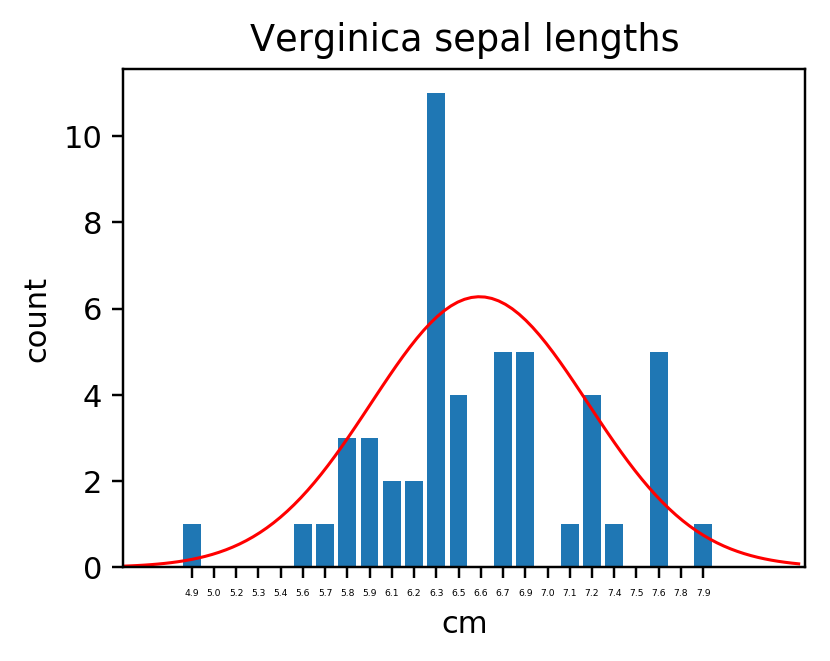

In [163]:
plt.figure(dpi=220, figsize=(4, 3))   # init & set size of the new plot (3" x 2", 220dpi)

plt.bar(v_centers, v_counts, v_bar_width)            # bar graph
plt.plot(x, normal, color='red', linewidth=1)        # add normal curve

plt.title('Verginica sepal lengths')
plt.ylabel("count")
plt.xlabel("cm")
plt.xticks(v_centers, v_labels, fontsize=3)
plt.xlim(x_lo, x_hi)

plt.show ()

In [164]:
# from scratch/statistics.py : normal_cdf(x:float, mu:float=0, sigma:float=1) -> float

# Probability of a length over 8 cm : 
prob8 = 1 - normal_cdf(8.0, mu, sd)      # part area under red curve where x > 8.0

print(f"The probability of a length bigger than 8 is {prob8:0.3f}.")

The probability of a length bigger than 8 is 0.013.


### correlation of two different rows

... is nearly zero, since these pairs of numbers are not related to each other.

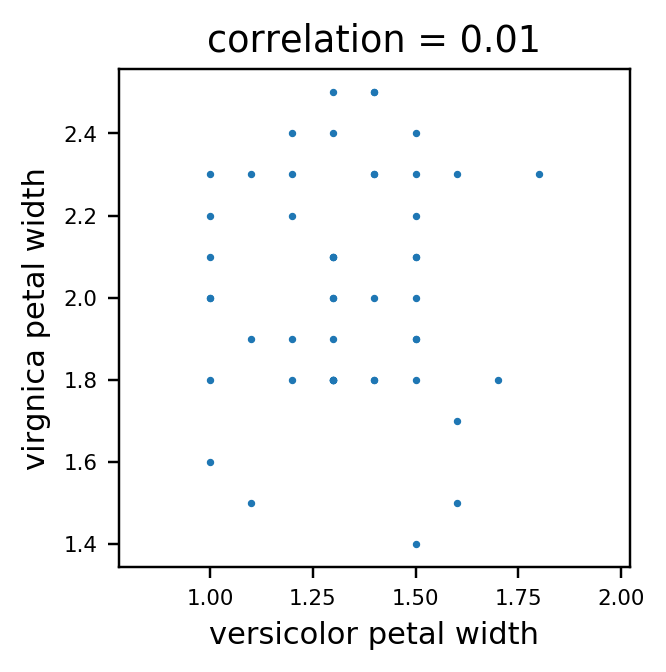

In [165]:
(xs, ys) = (iris['versicolor']['petal']['width'], 
          iris['virginica']['petal']['width'])

xy_corr = correlation(xs, ys)

plt.figure(dpi=220, figsize=(3, 3))

plt.scatter(xs, ys, s=2)    # s is marker size ; scalar or array (size of each one)

plt.title(f"correlation = {xy_corr:0.2f}")
plt.xlabel('versicolor petal width')
plt.ylabel('virgnica petal width')
plt.xticks(fontsize=7)   # Size set by trial and error.
plt.yticks(fontsize=7)   # (The changes from the last graph are still in effect.)

plt.axis("equal")                     # set distance scale on the two axes the same
plt.show()

### correlation of versicolor sepal and petal lengths

... is large. These pairs of numbers are both from the same row, 
i.e. from the same plant. Ones that have longer petals also
tend to have longer sepals ... because they're bigger plants, eh?

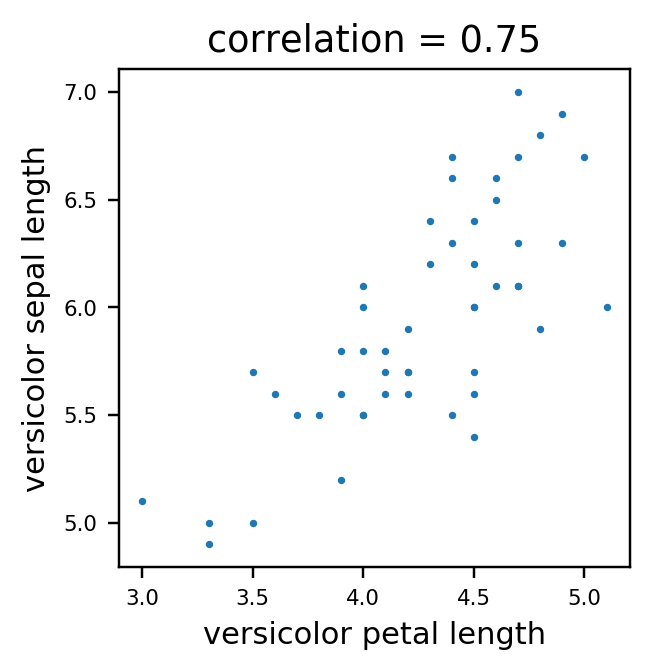

In [166]:
(xs, ys) = (iris['versicolor']['petal']['length'], 
            iris['versicolor']['sepal']['length'])

xy_corr = correlation(xs, ys)

plt.figure(dpi=220, figsize=(3, 3))

plt.scatter(xs, ys, s=2)

plt.title(f"correlation = {xy_corr:0.2f}")
plt.xlabel('versicolor petal length')
plt.ylabel('versicolor sepal length')
plt.xticks(fontsize=7)   
plt.yticks(fontsize=7)   

#plt.axis('equal')
#plt.xlim(2, 8)
#plt.ylim(2, 8)

plt.show()

In [167]:
str(list(zip(xs, ys)))

'[(4.7, 7.0), (4.5, 6.4), (4.9, 6.9), (4.0, 5.5), (4.6, 6.5), (4.5, 5.7), (4.7, 6.3), (3.3, 4.9), (4.6, 6.6), (3.9, 5.2), (3.5, 5.0), (4.2, 5.9), (4.0, 6.0), (4.7, 6.1), (3.6, 5.6), (4.4, 6.7), (4.5, 5.6), (4.1, 5.8), (4.5, 6.2), (3.9, 5.6), (4.8, 5.9), (4.0, 6.1), (4.9, 6.3), (4.7, 6.1), (4.3, 6.4), (4.4, 6.6), (4.8, 6.8), (5.0, 6.7), (4.5, 6.0), (3.5, 5.7), (3.8, 5.5), (3.7, 5.5), (3.9, 5.8), (5.1, 6.0), (4.5, 5.4), (4.5, 6.0), (4.7, 6.7), (4.4, 6.3), (4.1, 5.6), (4.0, 5.5), (4.4, 5.5), (4.6, 6.1), (4.0, 5.8), (3.3, 5.0), (4.2, 5.6), (4.2, 5.7), (4.2, 5.7), (4.3, 6.2), (3.0, 5.1), (4.1, 5.7)]'

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Linear Regression

Now I'll use those two variables to start to talk about linear regression.

For this first case, I'll use just one input (one "feature" = x) and 
one output (one "target" = y)  , and see how to find a way to model y given x
using a linear relationship.

I'll use the same notation that our textbook does in chapter 14.

$$ y_i \approx \beta x_i + \alpha  $$

Our model is defined by the two value $ (\alpha, \beta) $.

We start with any values for $ (\alpha, \beta) $, and then change them to make the model fit better.

To do that, we need a function that tells us how well the model fits.

And to do that, we should start (as we have for other machine learning tasks) 
by choosing a training and test set to first build and then second evaluate the model.

### partition into training and test data

In [168]:
import random

def get_train_test_indices(n, train_fraction=0.7):
    """ Return list of indeces i_train and i_test"""
    i = list(range(n))                    # indices for all the data
    n_train = int(n * train_fraction)     # size of training set
    i_train = random.sample(i, n_train)   # random sampling without replacement
    i_test = list(set(i) - set(i_train))  # indeces not in training set
    return (i_train, i_test)

get_train_test_indices(20)  # see if it does something reasonable

([7, 1, 5, 6, 13, 19, 2, 17, 4, 10, 3, 15, 18, 11], [0, 8, 9, 12, 14, 16])

In [169]:
(i_train, i_test) = get_train_test_indices(len(xs))

x_train = [xs[i] for i in i_train]
y_train = [ys[i] for i in i_train]
x_test = [xs[i] for i in i_test]
y_test = [ys[i] for i in i_test]

# OK, so now we have a training and test set.

### fitness function

We'll use the sum of the squared errors as our "how bad is this fit" function.
It's pretty simple, always positive, varies smoothly - all good stuff.

I'll call this function errors(); we want to minimize it. The text calls it
sum_of_sqerrors.

And for now I'll just sum the errors for all the data in our training function,
thinking of $(\alpha, \beta)$ as the inputs to this function. 

We train the model by changing $ (\alpha, \beta) $ slightly to improve the 
fit, and then looping until they are as good as possible.

(In practice you might use only some of the training data for this function,
since it might be too computationally expensive to sum over all it, especially
in a loop. There are various schemes - you could randomly pick a few or even
one $(x_i, y_i)$, and use that to improve $ (\alpha, \beta) $ a little,
and then do that in an (even longer) loop until they stopped changing.
But I'm getting ahead of myself.)

In [263]:

def squared_length(vector):
    """ return squared length of a a vector """
    return sum([vector[i] * vector[i] for i in range(len(vector))])

assert squared_length([3,4]) == 5**2

def errors(alpha, beta, xss, yss):
    """ Return sum of squared errors of line y=beta*x+alpha on given data """
    return squared_length([yss[i] - beta * xss[i] - alpha for i in range(len(xss))])

# Let's make a tiny set of 4 numbers to test this, with alpha=1, beta=2
# with an extra error of 1. Then the sum of squared errors should be 4*(1**2)=4.
xtiny = [1, 2, 3, 4]
ytiny = [ (xtiny[i] * 2 + 1) + 1  for i in range(len(xtiny)) ]
assert errors(1, 2, xtiny, ytiny) == 4


In [264]:
dot([1,2,3], [4,5,6])

32

The answer we should get for this simple case is 
something that any linear regression software or 
formula would tell us, for example
https://www.socscistatistics.com/tests/regression/default.aspx 
using numbers pasted in from the output of

    for y in y_train: print(y)
    print()
    for x in x_train: print(x)

    y = 0.79899 x + 2.52716

So we should get beta=0.8, alpha=2.5

Let's see if we can visualize what the errors() function
actually look like for various (alpha,beta) using 
these training values.

For any real problem, doing this wouldn't be feasable, since
we'd have way more values in our model than just (alpha,beta),
and it would be too computationally expensive. So you don't
really need to be able to do the stuff I'll do next. And so
I'll drop into some numpy tools rather than entirely "from scratch",
since that's what I'm (mostly) used to.

This sort of visualization can be a way to build intuition,
even if we can only do it for trivially simple examples.

In [291]:
# I'm going to use several numpy routines to draw a contour plot.
#    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
#    https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
#    https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html

# Set up a range of possible alpha and beta values
alphas_5 = np.linspace(0.5, 5.0, num=5)  # alpha values from 0.5 to 5.0
betas_5 =  np.linspace(0.1, 1.1, num=5)  # beta values from 0.1 to 1.1

(aa_5, bb_5) = np.meshgrid(alphas_5, betas_5) 

print(' aa_5 ')
print(aa_5)
print()
print('bb_5')
print(bb_5)

type(aa)

 aa_5 
[[0.5   1.625 2.75  3.875 5.   ]
 [0.5   1.625 2.75  3.875 5.   ]
 [0.5   1.625 2.75  3.875 5.   ]
 [0.5   1.625 2.75  3.875 5.   ]
 [0.5   1.625 2.75  3.875 5.   ]]

bb_5
[[0.1  0.1  0.1  0.1  0.1 ]
 [0.35 0.35 0.35 0.35 0.35]
 [0.6  0.6  0.6  0.6  0.6 ]
 [0.85 0.85 0.85 0.85 0.85]
 [1.1  1.1  1.1  1.1  1.1 ]]


numpy.ndarray

In [292]:
# flatten a 2D matrix into a 1D array
aa_5.flatten()

array([0.5  , 1.625, 2.75 , 3.875, 5.   , 0.5  , 1.625, 2.75 , 3.875,
       5.   , 0.5  , 1.625, 2.75 , 3.875, 5.   , 0.5  , 1.625, 2.75 ,
       3.875, 5.   , 0.5  , 1.625, 2.75 , 3.875, 5.   ])

In [267]:
# do something to each point, then convert back to a 2D array.
array([ (a+b) for (a,b) in zip(aa_5.flatten(), bb_5.flatten())]).reshape(5,5)

array([[0.6  , 1.725, 2.85 , 3.975, 5.1  ],
       [0.85 , 1.975, 3.1  , 4.225, 5.35 ],
       [1.1  , 2.225, 3.35 , 4.475, 5.6  ],
       [1.35 , 2.475, 3.6  , 4.725, 5.85 ],
       [1.6  , 2.725, 3.85 , 4.975, 6.1  ]])

-----------

In [269]:
# OK, now do that for real, on a bigger array, using the errors() function
# to get a list of zz=errors values that we can use for a contour plot.
#
# I'll call the errors ee, sticking to my (aa, bb)
# convention - which reminds me that these are 2D arrays.

grid_size = 40
(a_min, a_max) = (1.5, 3.5)
(b_min, b_max) = (0.5, 1.1)

alphas = np.linspace(a_min, a_max, num=grid_size)
betas =  np.linspace(b_min, b_max, num=grid_size)
(aa, bb) = np.meshgrid(alphas, betas) 

ee = array([ errors(a, b, x_train, y_train) 
             for (a,b) in zip(aa.flatten(), bb.flatten())
           ]).reshape(grid_size, grid_size)

ee_low = min(ee.flatten())
ee_high = max(ee.flatten())
ee_levels = np.linspace(1.1 * ee_low, 0.9 * ee_high, num=10)


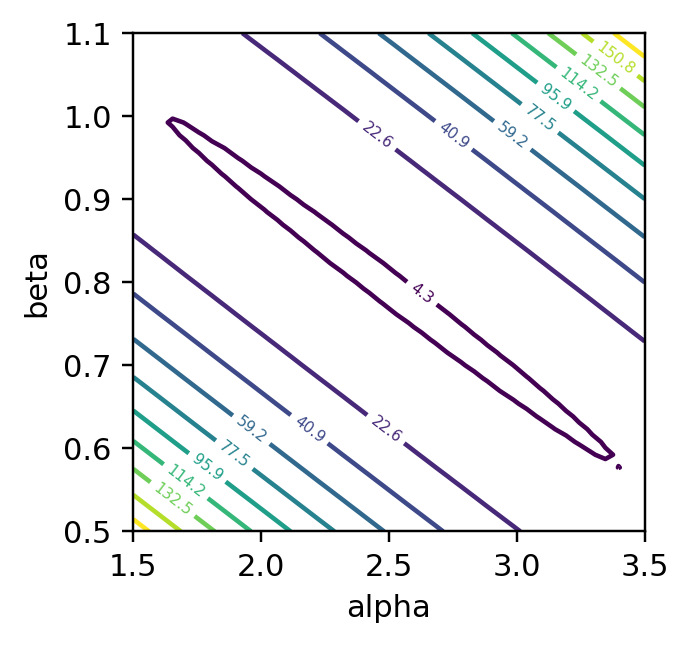

In [270]:
# See for example https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html

plt.figure(dpi=220, figsize=(3, 3))

ee_contour = plt.contour(aa, bb, ee, levels=ee_levels)
plt.clabel(ee_contour, inline=1, fontsize=5, fmt='%1.1f')
plt.xlabel('alpha')
plt.ylabel('beta')

plt.show()

Each point is one value for (alpha, beta) - that is, one possible line to fit the data - 
with all the training data used to find the overall sum-of-squares error.

Imagine that this is a valley between two hills. You're the hiker, trying to find
your way to the bottom. Each place that you stand gives one value for (alpha, beta).

The "gradient descent" algorithm, discussed in chapter 8, is an iterative method
for finding your way to the bottom. The ideas are those of multi-variable calculus : 
we take a tiny step in each of the directions that we can move, and see how 
much the error changes in that direction. All together that gives us a vector
that we can use to find the "downhill" direction. Then we take a small step
in that (d_alpha, d_beta) direction.


In [271]:
# Suppose in the contour picture above we start at (alpha, beta) = (2.6, 0.9)
(alpha, beta) = (2.6, 0.9)

# The error at that point is
errors(alpha, beta, x_train, y_train)

14.511500000000002

In [272]:
# We want to figure out what change we should make in (alpha, beta)
# to head downhill.

# First consider a tiny change in alpha of 0.01 .
d_alpha = 0.01

# The error at (alpha + d_alpha, beta) is
errors(alpha + d_alpha, beta, x_train, y_train)

14.899199999999993

In [273]:
# Second consider a tiny change in beta of 0.01 .
d_beta = 0.01

# The error at (alpha + d_alpha, beta) is
errors(alpha, beta + d_beta, x_train, y_train)

16.204895000000004

Both of these changes increase the error,
and so we should move in the opposite direction,
by decreasing both alpha and beta.

But since the change in beta made the error bigger,
that one is more important. And so we should make
a bigger decrease in beta than alpha

It turns out that the *rate* of change in each direction,
as a vector, lets us do this in a quantitative way.

The vector we want is called "the gradient". The math symbol for is named "nabla", $\nabla$. 

If the squared error is $E$, then we want

$$ \nabla E = [ \frac{\Delta E}{\Delta \alpha} , \frac{\Delta E}{\Delta \beta} ] $$

And it turns out that if we move in some direction $ [da, db] $, the change in the error is
the vector dot product of the gradient and our displacement.

$$ 
dE = \nabla E \cdot [\Delta \alpha, \Delta \beta] = 
[ \frac{\Delta E}{\Delta \alpha} , \frac{\Delta E}{\Delta \beta} ] 
\cdot [\Delta \alpha, \Delta \beta] 
=  \frac{\partial E}{\partial \alpha} \Delta \alpha + \frac{\partial E}{\partial \beta} \Delta \beta
$$

Therefore once we know the gradient, we can find the way downhill,
in other words the best direction to move from here 
in order to heads toward the minimum of the error.

The gradient itself points uphill, in the direction of steepest ascent.
A vector perpendicular stays at the same height, and the opposite
direction is the fastest way downhill.

In [274]:
def grad(a, b, da=0.01, db=0.01):
    """ return the gradient : [dE/da, dE/db] """
    # First find the change of the error in each direction.
    dE_a = errors(a + da/2, b, x_train, y_train) - errors(a - da/2, b, x_train, y_train)
    dE_b = errors(a, b + db/2, x_train, y_train) - errors(a, b - db/2, x_train, y_train)
    # Then do the division and return the vector.
    return [dE_a / da, dE_b / db]

def dot(vec1, vec2):
    """ return the dot product of two vectors """
    return sum([vec1[i]*vec2[i] for i in range(len(vec1))])


In [275]:
# Here's the gradient at the position where we are now.
g = grad(alpha, beta)

print(f"at alpha={alpha:0.4}, beta={beta:0.4}, gradient=({g[0]:0.4}, {g[1]:0.4})")

at alpha=2.6, beta=0.9, gradient=(38.42, 163.1)


## What's next ?

The next step is to move in the direction of the gradient,
loop until it stops changing or nearly so,
and see if we get to the right answer.

And measure the answer we get on the test set to see 
whether what we have has over-fit the training data
or works in general.

And perhaps to try the whole thing over with different
randomized training / testing partitions.

## And after that?

Manay more variations are out there including

1. We can sometimes find the gradient by an analytic formula - using calculus - rather than (error(x+dx) - error(x)) as I've done here.

2. Lots more features. As we've seen rather than using x (1 feature) to predict y (1 target), we can use (x1, x2, x3, ...) lots of feature. Then our model is parametized by something like (a1, a2, a3, b) ... lots of coefficients. The multi-linear model is

$$ y = a_1 * x_1 + a_2 * x_2 + a_3 * x_3 + b $$

and our gradient has lots more dimensions than two.

3. Tricker modeling functions like the logistic map which smoothly changes between 0 and 1, to give probabilities for having a certain property we're trying to predict.

$$ y = f (a_1 * x_1 + a_2 * x_2 + a_3 * x_3) $$

where $ f(x) $ is the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) . Think "logic", i.e. true/false, i.e. 1 or 0.


## All for now ...

Below this is my tests and thinking.


### Testing : looking at moving in different directions

The quiver plot is not behaving as expected ... so I'm trying to look at the numbers.

The gradient should point at the direction of steepest ascent of the errors(a,b) function.
By creating a vector perpendicular to the gradient, I can set up a coordinate system
and test vector offsets in a circle, and look at how much the error function changes,
both by the gradient formula dot(grad, offset) and directly as (errors(ab) - errors(ab+offset)).

I've done this, and it all looks OK : the errors are the same calculated both ways,
and the largest change is in the direction of the gradient.

So ... I'm not sure what's wrong with the vector quiver plot

In [276]:
# a vector erpendicular to the gradient.
g_perp = [g[1], -g[0]]
dot(g, g_perp)

0.0

In [298]:
gn = np.array(g) / np.sqrt(dot(g, g))   # gradient vector, normalized
pn = np.array([gn[1], -gn[0]])          # perpendicular vector, normalized

print(f"grad normalized = {gn}")
print(f"perp normalized = {pn}")
print()

step = 0.01  # length of (da,db) vector (will be step size in gradient descent)
for theta in np.linspace(0.001, 2*np.pi, num=10):
    offset = step * ( np.cos(theta) * gn + np.sin(theta) * pn )  # i.e. R*(i_hat*cos()+j_hat*sin()) = (d_alpha, d_beta)
    d_error_1 = dot(g, offset)                                   # i.e. dE = [(dE/da), (dE/db)] . [da, db]
    d_error_2 = errors(alpha + offset[0]/2, beta + offset[1]/2, x_train, y_train) - \
                errors(alpha - offset[0]/2, beta - offset[1]/2, x_train, y_train)
    print(f" theta: {theta * 180/np.pi :8.5}deg  | de_1: {d_error_1:8.4}   de_2: {d_error_2:8.4}")
    
# Both here and in the grad() definition I'm using
# the symmetric f(x+dx/2)-f(x-dx/2) difference
# for the rate of change at f(x).

grad normalized = [0.2292988  0.97335608]
perp normalized = [ 0.97335608 -0.2292988 ]

 theta: 0.057296deg  | de_1:    1.676   de_2:    1.676
 theta:   40.051deg  | de_1:    1.283   de_2:    1.283
 theta:   80.045deg  | de_1:   0.2897   de_2:   0.2897
 theta:   120.04deg  | de_1:  -0.8387   de_2:  -0.8387
 theta:   160.03deg  | de_1:   -1.575   de_2:   -1.575
 theta:   200.03deg  | de_1:   -1.574   de_2:   -1.574
 theta:   240.02deg  | de_1:  -0.8373   de_2:  -0.8373
 theta:   280.01deg  | de_1:   0.2913   de_2:   0.2913
 theta:   320.01deg  | de_1:    1.284   de_2:    1.284
 theta:    360.0deg  | de_1:    1.676   de_2:    1.676


# --- BUGGY ---

### vector plot of gradient

This is *not* doing what it should - the gradient vectors
aren't perpendicular to the contours.

After playing around with this for a few hours, I'm still not sure what's wrong.

The vector lengths look OK - it's tiny where it should be. But the angles are off.

In [293]:
grid_size = 40
(a_min, a_max) = (1.5, 3.5)
(b_min, b_max) = (0.5, 1.1)

alphas = np.linspace(a_min, a_max, num=grid_size)
betas =  np.linspace(b_min, b_max, num=grid_size)
(aa, bb) = np.meshgrid(alphas, betas) 

uu = array([ grad(a, b)[0] 
             for (a,b) in zip(aa.flatten(), bb.flatten())
           ]).reshape(grid_size, grid_size)

vv = array([ grad(a, b)[1]
             for (a,b) in zip(aa.flatten(), bb.flatten())
           ]).reshape(grid_size, grid_size)


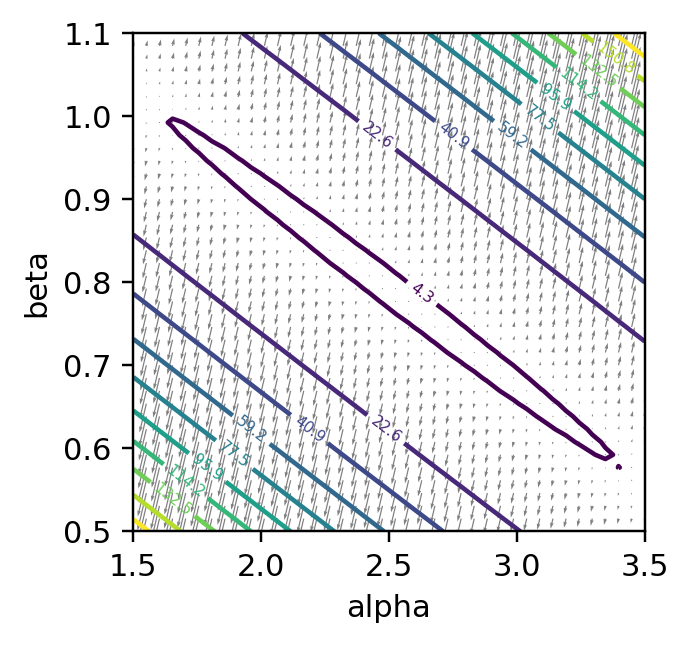

In [297]:
# Let's superimpose the gradient on our plot to see it.

plt.figure(dpi=220, figsize=(3, 3))
ee_contour = plt.contour(aa, bb, ee, levels=ee_levels)
plt.clabel(ee_contour, inline=1, fontsize=5, fmt='%1.1f')
plt.xlabel('alpha')
plt.ylabel('beta')

plt.quiver(aa, bb, uu, vv, scale=8e3, color='grey')  # bigger scale => smaller vectors

plt.show()